# 🗺️ Brian's Maps

> Notice: [Carpenter Workshop](https://github.com/blaylockbk/Carpenter_Workshop) must be installed.

This notebook demonstrates how to plot GRIB2 data retrieved from Herbie on a map using my custom Carpenter Workshop tools.This is not meant to replace an other Cartopy tutorials, so if you are unfamilar with Cartopy, I suggest you first refer to the [Project Pythia Cartopy tutorial](https://foundations.projectpythia.org/core/cartopy/cartopy.html).


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from herbie import Herbie
from herbie.toolbox import EasyMap, pc, ccrs

Download some HRRR data. Let's look at composite reflectivity


In [2]:
ds = Herbie("2022-12-10 12:00").xarray("REFC:entire")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Dec-10 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/home/blaylock/data/hrrr/20221210]


---

What does the data look like when we plot it?


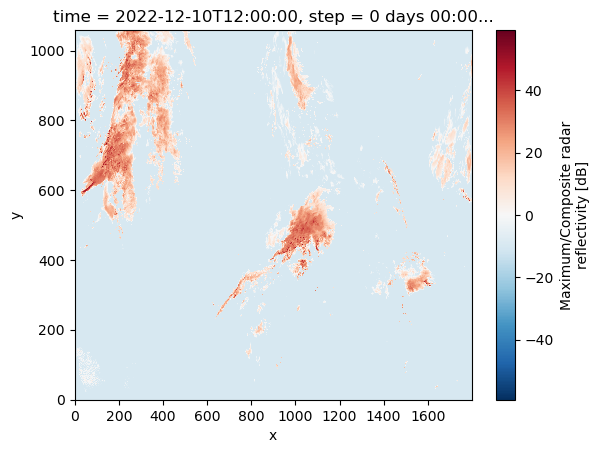

In [3]:
ds.refc.plot()

Fun fact: this reflectivity field uses `-10` as the missing value. Lets just replace any negative number with nan. (Can anyone tell me why there are reflectivities less than zero?)


In [4]:
ds["refc"] = ds.refc.where(ds.refc > 0)  # sets all negative values to nan

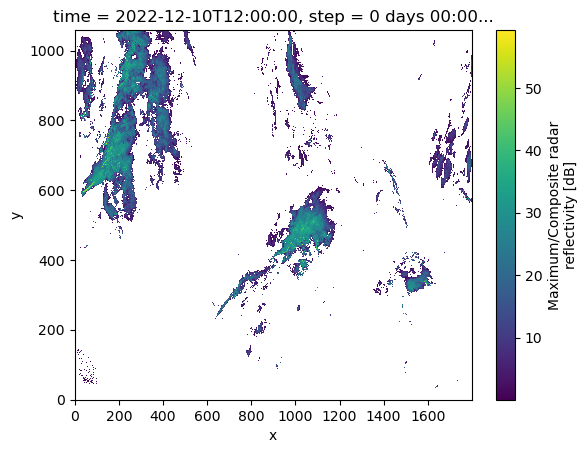

In [5]:
ds.refc.plot()

Applying the mask sure makes the reflectivity data look better.

Ok, but we really want to see this data on a map. Let's use the Cartopy Workshop `EasyMap()`.


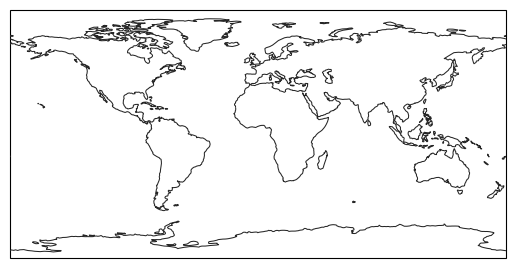

In [6]:
ax = EasyMap().ax

Notice that it gives us a Platte Carree map of the world. We can use this to plot our HRRR data onto


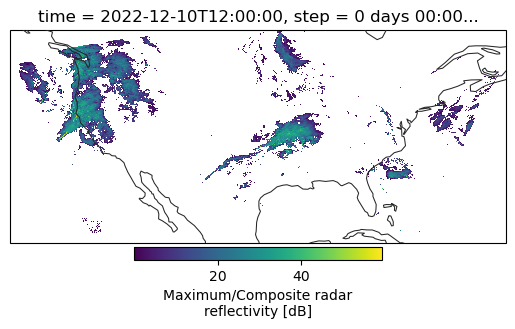

In [7]:
ax = EasyMap().ax
ds.refc.plot(
    x="longitude",
    y="latitude",
    ax=ax,
    transform=pc,
    cbar_kwargs={"shrink": 0.5, "orientation": "horizontal", "pad": 0.01},
)

We can add other features, like states and a border around the HRRR domain


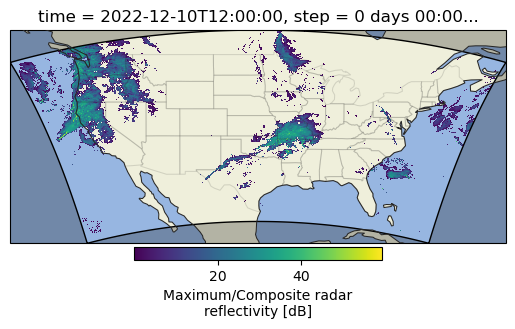

In [8]:
ax = EasyMap().STATES().OCEAN().LAND().DOMAIN(ds).ax
ds.refc.plot(
    x="longitude",
    y="latitude",
    ax=ax,
    transform=pc,
    cbar_kwargs={"shrink": 0.5, "orientation": "horizontal", "pad": 0.01},
)

Dark mode even looks cool.


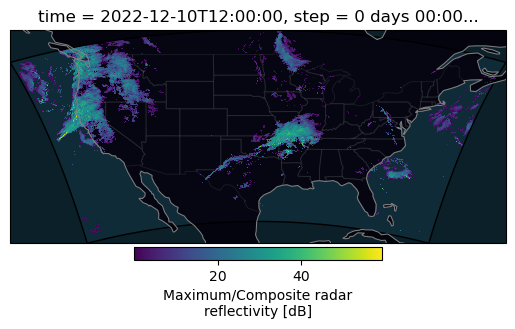

In [9]:
ax = EasyMap(theme="dark").STATES().OCEAN().LAND().DOMAIN(ds).ax
ds.refc.plot(
    x="longitude",
    y="latitude",
    ax=ax,
    transform=pc,
    cbar_kwargs={"shrink": 0.5, "orientation": "horizontal", "pad": 0.01},
)

To plot on different map projects, we need to know what coordinate system the model uses. Herbie has a custom xarray accessor that uses Metpy and Pygrib to parse the projection informtion.


(-2968870.450240295,
 2967830.1651519067,
 -1858656.4446616783,
 1858044.4074320858)

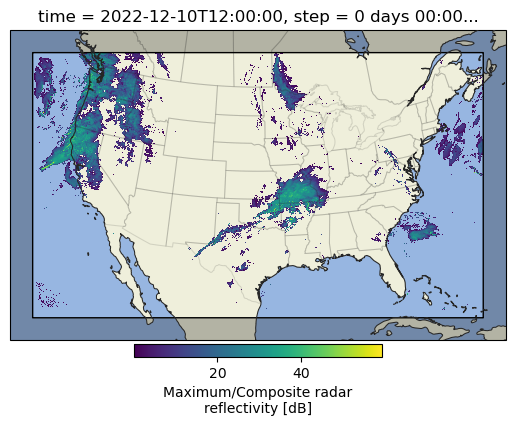

In [10]:
crs = ds.herbie.crs

ax = EasyMap("50m", crs=crs).STATES().OCEAN().LAND().DOMAIN(ds).ax
ds.refc.plot(
    x="longitude",
    y="latitude",
    ax=ax,
    transform=pc,
    cbar_kwargs={"shrink": 0.5, "orientation": "horizontal", "pad": 0.01},
)

ax.adjust_extent()
# make the map extent slightly larger

Now lets zoom on a specific region and show a Stamen map background


<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>


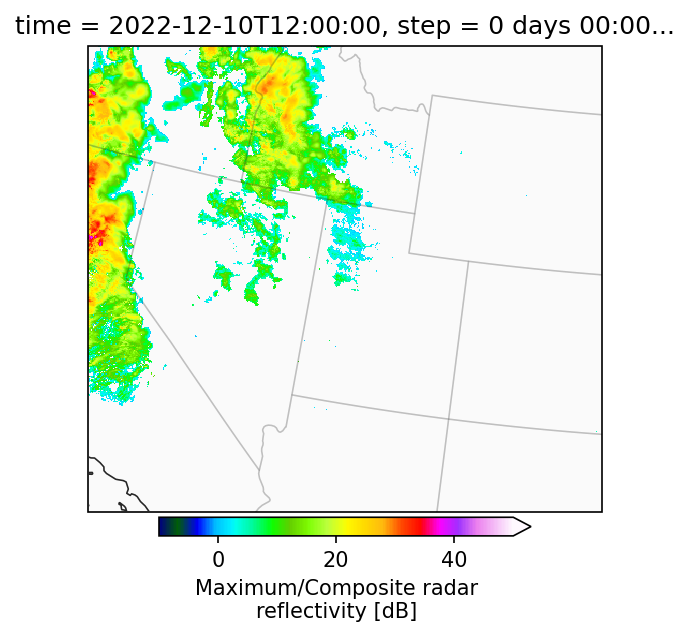

In [11]:
crs = ds.herbie.crs

ax = EasyMap("50m", crs=crs, dpi=150).STATES().STAMEN(zoom=6).ax
ds.refc.plot(
    x="longitude",
    y="latitude",
    ax=ax,
    transform=pc,
    cmap="gist_ncar",
    vmin=-10,
    vmax=50,
    cbar_kwargs={"shrink": 0.5, "orientation": "horizontal", "pad": 0.01},
)

ax.set_extent([-120, -105, 35, 45], crs=pc)

Here's the Polygon; you may need to do `_.geoms[i]` to get Polygons from the shape.


(-124.61438873320435,
 -114.61438873320435,
 32.253894888712104,
 42.253894888712104)

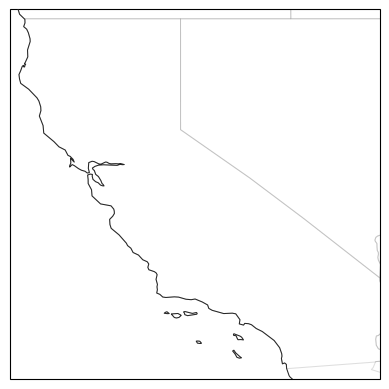

In [4]:
ax = EasyMap("50m").STATES().ax
ax.center_extent(state="CA")